
Circuit string: R0-p(R1,CPE1)
Fit: True

Initial guesses:
     R0 = 7.00e+00 [Ohm]
     R1 = 9.00e+00 [Ohm]
  CPE1_0 = 1.00e-02 [Ohm^-1 sec^a]
  CPE1_1 = 9.00e-01 []

Fit parameters:
     R0 = 5.94e+00  (+/- 1.96e-01) [Ohm]
     R1 = 5.70e+01  (+/- 3.22e-01) [Ohm]
  CPE1_0 = 4.43e-05  (+/- 2.20e-06) [Ohm^-1 sec^a]
  CPE1_1 = 8.33e-01  (+/- 7.11e-03) []


Circuit string: R0-p(R1,CPE1)
Fit: True

Initial guesses:
     R0 = 7.00e+00 [Ohm]
     R1 = 9.00e+00 [Ohm]
  CPE1_0 = 1.00e-02 [Ohm^-1 sec^a]
  CPE1_1 = 9.00e-01 []

Fit parameters:
     R0 = 6.51e+00  (+/- 6.94e-02) [Ohm]
     R1 = 8.87e+00  (+/- 1.01e-01) [Ohm]
  CPE1_0 = 2.76e-04  (+/- 2.77e-05) [Ohm^-1 sec^a]
  CPE1_1 = 7.28e-01  (+/- 1.29e-02) []


Circuit string: R0-p(R1,CPE1)
Fit: True

Initial guesses:
     R0 = 7.00e+00 [Ohm]
     R1 = 9.00e+00 [Ohm]
  CPE1_0 = 1.00e-02 [Ohm^-1 sec^a]
  CPE1_1 = 9.00e-01 []

Fit parameters:
     R0 = 6.57e+00  (+/- 1.79e-01) [Ohm]
     R1 = 3.64e+01  (+/- 2.53e-01) [Ohm]
  CPE1_0 = 3.88e-05 

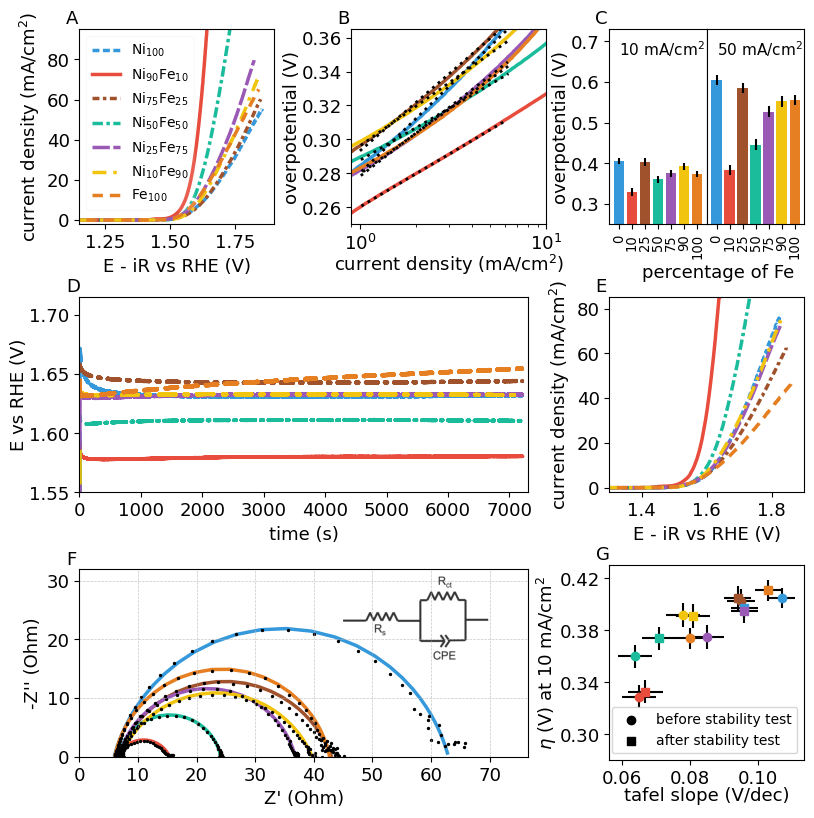

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.image as mpimg
import pandas as pd
from impedance.models.circuits import CustomCircuit
from impedance import preprocessing
from scipy.optimize import curve_fit

def linear_model(x, m, b):
    return m * x + b

length = 8
height = 8

axes_l1 = 1.95
axes_l4 = axes_l1*2.3
axes_l6 = axes_l1*1.2
axes_l8a = axes_l1*0.4

axes_w1 = axes_l1
axes_w8a = axes_l1*0.4

x_offset = 0.7
y_offset = axes_w1/4

label_font = 13
tick_font = 13
legend_font = 10

linewidth = 2.5

range_min = 10**(0)
range_max = 10**(0.8)

fig = plt.figure(figsize=(length, height))


plt.rcParams['xtick.labelsize'] = tick_font
plt.rcParams['ytick.labelsize'] = tick_font

axes1 = fig.add_axes([(x_offset)/length, \
                      (4*y_offset+2*axes_w1)/height, axes_l1/(length), axes_w1/(height)])  # top-left
axes2 = fig.add_axes([(2.1*x_offset+axes_l1)/length, \
                      (4*y_offset+2*axes_w1)/height, axes_l1/(length), axes_w1/(height)])  # top-center
axes3a = fig.add_axes([(3*x_offset+2*axes_l1)/length, \
                      (4*y_offset+2*axes_w1)/height,  0.5*axes_l1/(length), axes_w1/(height)])  # top-right
axes3b = fig.add_axes([(3*x_offset+2.5*axes_l1)/length, \
                      (4*y_offset+2*axes_w1)/height,  0.5*axes_l1/(length), axes_w1/(height)])  # top-right
axes4 = fig.add_axes([(x_offset)/length, \
                      (2.5*y_offset+axes_w1)/height, (axes_l4)/(length), axes_w1/(height)])  # middle-left
axes5 = fig.add_axes([(3*x_offset+2*axes_l1)/length, \
                      (2.5*y_offset+1*axes_w1)/height,  axes_l1/(length), axes_w1/(height)])  # middle-right
axes6 = fig.add_axes([(x_offset)/length, \
                      (1*y_offset)/height, axes_l4/(length), axes_w1/(height)])  # bottom-left
axes7 = fig.add_axes([(3*x_offset+2*axes_l1)/length, \
                      (1*y_offset)/height, axes_l1/(length), axes_w1/(height)])  # bottom-right


for axes in fig.axes:
    axes.set_xticks([]) 
    axes.set_yticks([])

# axes 1 and 2 - linear sweep voltammetry and Tafel plot

filenames=[['Activity_1_CV/Ni100_Activity_1_CV_1_02_CV_C01.txt','Ni$_{100}$','#3498db',(0, (2, 1, 2, 1)),0.008,0.012],\
           ['Activity_1_CV/Ni90Fe10_Activity_1_CV_1_02_CV_C01.txt','Ni$_{90}$Fe$_{10}$','#e74c3c','-', 0.009,0.013],\
          ['Activity_1_CV/Ni75Fe25_Activity_1_CV_1_02_CV_C01.txt','Ni$_{75}$Fe$_{25}$','sienna',(0, (2, 1, 1, 1)), 0.009,0.013],\
          ['Activity_1_CV/Ni50Fe50_Activity1_CV1_02_CV_C01.txt','Ni$_{50}$Fe$_{50}$','#1abc9c',(0, (3, 1, 1, 1)), 0.009,0.013],\
          ['Activity_1_CV/Ni25Fe75_Activity_1_CV_1_02_CV_C01.txt','Ni$_{25}$Fe$_{75}$','#9b59b6',(0, (5, 1)),0.009,0.013],\
          ['Activity_1_CV/Ni10Fe90_Activity_1_CV1_02_CV_C01.txt','Ni$_{10}$Fe$_{90}$','#f1c40f',(0, (4, 2, 1, 2)), 0.009,0.013],\
          ['Activity_1_CV/Fe100_Activity_1_CV_1_02_CV_C01.txt','Fe$_{100}$','#e67e22',(0, (3, 2)),0.008,0.012]]

tafel_eta_file = open('tafel_eta_file.txt', 'w')

for filename, label, color, linestyle, overpotential_error, overpotential_error_50 in filenames:
    data = pd.read_csv(filename,delimiter='\t',decimal=',',skiprows=1,header=None,dtype=float)
    
    voltage = np.array(data.iloc[:,0]+0.059*14+0.098) #voltage in V
    current_density=np.array(data.iloc[:,1]/0.196) # current density in mA/cm^2

    #iR correction - average solution resistance obtained from Nyquist fit is substracted

    voltage = voltage - current_density*0.196*6.48*0.001
    
    axes1.plot(voltage[0:voltage.argmax()],current_density[0:voltage.argmax()],\
             label=label, linestyle = linestyle, linewidth = linewidth,color=color)
    eta_10 = round(np.interp(10, current_density[np.argwhere(np.diff(np.sign(\
        current_density - 10))).flatten()], voltage[np.argwhere(np.diff(np.sign(current_density - 10))).flatten()]) - 1.23, 3)
    eta_50 = round(np.interp(50, current_density[np.argwhere(np.diff(np.sign(\
        current_density - 50))).flatten()], voltage[np.argwhere(np.diff(np.sign(current_density - 50))).flatten()]) - 1.23, 3)

    overpotential_full = voltage[0:voltage.argmax()] - 1.23
    current_density = current_density[0:voltage.argmax()]
    range = (current_density > range_min) & (current_density < range_max)
    log_current_density = np.log10(current_density[range])
    overpotential = overpotential_full[range]
    # uncertainty in overpotential estimated through propagation of error

    popt, pcov = curve_fit(
        linear_model, 
        log_current_density, 
        overpotential, 
        sigma=np.full_like(log_current_density, overpotential_error), 
        absolute_sigma=True
    )

    slope, intercept = popt
    slope_error, intercept_error = np.sqrt(np.diag(pcov))

    # Round the results
    slope = round(slope, 3)
    slope_error = round(slope_error, 3)
    tafel_eta_file.write(label+'\t'+str(slope)+'\t'+str(eta_10)+'\t'+str(eta_50)+'\t'+color+'\t'+str(slope_error)+'\t'+str(overpotential_error)+'\t'+str(overpotential_error_50)+'\n')
    axes2.plot(current_density[range], \
               intercept+0.000 + slope * log_current_density+0.0, label=label,color = 'black',\
               zorder = 1, linestyle = 'dotted', linewidth = 2)
    axes2.plot(current_density[current_density > 0], \
               overpotential_full[current_density > 0], color = color, linestyle = '-', linewidth = linewidth, zorder = 0)

tafel_eta_file.close()

axes1.xaxis.set_major_locator(ticker.AutoLocator())
axes1.yaxis.set_major_locator(ticker.AutoLocator())
axes1.set_xlim(1.15,1.9)
axes1.set_ylim(-2,95)
axes1.legend(fontsize=legend_font, framealpha=0.1)

axes1.set_yticks([0, 20, 40, 60, 80])

axes1.set_xlabel('E - iR vs RHE (V)',fontsize=label_font)
axes1.set_ylabel('current density (mA/cm$^2$)',fontsize=label_font, labelpad=3)

axes2.xaxis.set_major_locator(ticker.AutoLocator())
axes2.yaxis.set_major_locator(ticker.AutoLocator())
axes2.set_xlim(0.9,10)
axes2.set_ylim(0.25,0.365)
axes2.set_yticks([0.26, 0.28, 0.30, 0.32, 0.34, 0.36])

axes2.set_xscale('log')
axes2.set_xlabel('current density (mA/cm$^2$)',fontsize=label_font, labelpad=-1)
axes2.set_ylabel('overpotential (V)',fontsize=label_font, labelpad=0)

# axes 3 - overpotential histograms

filename = 'tafel_eta_file.txt'
data = pd.read_csv(filename,delimiter='\t',header=None)

data.iloc[:,0] = ['0', '10', '25', '50', '75', '90', '100']

colors_for_axes3a = ['#3498db', '#e74c3c', 'sienna', '#1abc9c', '#9b59b6', '#f1c40f','#e67e22' ]
colors_for_axes3b = ['#3498db', '#e74c3c', 'sienna', '#1abc9c', '#9b59b6', '#f1c40f','#e67e22'] 


axes3a.bar(data.iloc[:,0],data.iloc[:,2].astype(float), yerr = data.iloc[:,6].astype(float),color=colors_for_axes3a,label='10 mA/cm$^2$')
axes3a.set_ylim(0.25,0.73)
axes3a.set_ylabel('overpotential (V)',fontsize=label_font, labelpad=1)
axes3a.set_xlabel('percentage of Fe',fontsize=label_font)
axes3a.xaxis.set_label_coords(1.12, -0.2) 

axes3a.xaxis.set_major_locator(ticker.AutoLocator())
axes3a.yaxis.set_major_locator(ticker.AutoLocator())

axes3a.set_yticks([0.3, 0.4, 0.5, 0.6, 0.7])
axes3a.set_xticks(data.iloc[:,0])
axes3a.set_xticklabels(data.iloc[:,0], rotation=90,size=9.5)

axes3b.bar(data.iloc[:,0],data.iloc[:,3].astype(float), yerr = data.iloc[:,7].astype(float), color=colors_for_axes3b,label='50 mA/cm$^2$')
axes3b.set_ylim(0.25,0.73)
axes3b.set_xticks(data.iloc[:,0])
axes3b.set_xticklabels(data.iloc[:,0], rotation=90,size=9.5)


# axes 4 - stability test


filenames=[['Stability_CP/Ni100_stability_10mA_cm2_2hr_02_CP_C01.txt','Ni$_{100}$/CeO$_2$','#3498db',(0, (20, 10, 20, 10))],\
           ['Stability_CP/Ni90Fe10_stability_10mA_cm2_2hr_02_CP_C01.txt','Ni$_{90}$Fe$_{10}$/CeO$_2$','#e74c3c','-'],\
          ['Stability_CP/Ni75Fe25_stability_10 mA_cm2_02_CP_C01.txt','Ni$_{75}$Fe$_{25}$/CeO$_2$','sienna',(0, (40, 20, 10, 20))],\
          ['Stability_CP/Ni50Fe50_stability_10mA_cm2_2hrs_02_CP_C01.txt','Ni$_{50}$Fe$_{50}$/CeO$_2$','#1abc9c',(0, (24, 8, 4, 8))],\
          ['Stability_CP/Ni25Fe75_stability_10mA_cm2_2hr_02_CP_C01.txt','Ni$_{25}$Fe$_{75}$/CeO$_2$','#9b59b6',(0, (50, 10))],\
          ['Stability_CP/Ni10Fe90_stabilty_10mA_cm2_02_CP_C01.txt','Ni$_{10}$Fe$_{90}$/CeO$_2$','#f1c40f',(0, (40, 20, 10, 20))],\
          ['Stability_CP/Fe100_stability_10mA_cm2_2hr_02_CP_C01.txt','Fe$_{100}$/CeO$_2$','#e67e22',(0, (50, 30))]]

for filename, label, color, ls in filenames:
    
    data = pd.read_csv(filename,delimiter='\t',decimal=',',skiprows=1,header=None,dtype=float)
    time_sec=data.iloc[:,0] #time in seconds
    voltage = data.iloc[:,1]+0.059*14+0.098
    
    axes4.plot(time_sec,voltage,\
                label=label, linewidth = linewidth,linestyle=ls,color=color)

axes4.xaxis.set_major_locator(ticker.AutoLocator())
axes4.yaxis.set_major_locator(ticker.AutoLocator())
axes4.set_xlim(0.0,7300)
axes4.set_ylim(1.55,1.715)
axes4.set_yticks([1.55, 1.60, 1.65, 1.70])

axes4.set_xlabel('time (s)',fontsize=label_font)
axes4.set_ylabel('E vs RHE (V)',fontsize=label_font, labelpad=1)

# axes 5 - post stability LSV

filenames=[['Activity_2_CV/Ni100_Activity_2_CV_2_02_CV_C01.txt','Ni$_{100}$/CeO$_2$','#3498db',(0, (2, 1, 2, 1)),0.008],\
           ['Activity_2_CV/Ni90Fe10_Activity_2_CV_2_02_CV_C01.txt','Ni$_{90}$Fe$_{10}$/CeO$_2$','#e74c3c','-',0.009],\
          ['Activity_2_CV/Ni75Fe25_Activity_2_CV_2_02_CV_C01.txt','Ni$_{75}$Fe$_{25}$/CeO$_2$','sienna',(0, (2, 1, 1, 1)),0.009],\
          ['Activity_2_CV/Ni50Fe50_Activity2_CV2_02_CV_C01.txt','Ni$_{50}$Fe$_{50}$/CeO$_2$','#1abc9c',(0, (3, 1, 1, 1)),0.009],\
          ['Activity_2_CV/Ni25Fe75_Activity_2_CV_2_02_CV_C01.txt','Ni$_{25}$Fe$_{75}$/CeO$_2$','#9b59b6',(0, (5, 1)),0.009],\
          ['Activity_2_CV/Ni10Fe90_Activity_2_CV2_02_CV_C01.txt','Ni$_{10}$Fe$_{90}$/CeO$_2$','#f1c40f',(0, (4, 2, 1, 2)),0.009],\
          ['Activity_2_CV/Fe100_Activity_2_CV_2_02_CV_C01.txt','Fe$_{100}$/CeO$_2$','#e67e22',(0, (3, 2)),0.008]]

tafel_eta_file = open('tafel_eta_file_after.txt', 'w')

for filename, label, color, ls, overpotential_error in filenames:
    data = pd.read_csv(filename,delimiter='\t',decimal=',',skiprows=1,header=None,dtype=float)
    
    voltage = np.array(data.iloc[:,0]+0.059*14+0.098)  #voltage in V
    current_density=np.array(data.iloc[:,1]/0.196) # current density in mA/cm^2

    # iR correction --> V=V_0-iR where R= avg.solution resistance obtained from Nyquist plot below
    
    voltage= voltage-current_density*0.196*6.48*0.001
    
    axes5.plot(voltage[0:voltage.argmax()],current_density[0:voltage.argmax()],\
             label=label, ls=ls, linewidth = linewidth,color=color)
    eta_10 = round(np.interp(10, current_density[np.argwhere(np.diff(np.sign(\
        current_density - 10))).flatten()], voltage[np.argwhere(np.diff(np.sign(current_density - 10))).flatten()]) - 1.23, 3)
    eta_50 = round(np.interp(10, current_density[np.argwhere(np.diff(np.sign(\
        current_density - 10))).flatten()], voltage[np.argwhere(np.diff(np.sign(current_density - 10))).flatten()]) - 1.23, 3)

    overpotential_full = voltage[0:voltage.argmax()] - 1.23
    current_density = current_density[0:voltage.argmax()]
    range = (current_density > range_min) & (current_density < range_max)
    log_current_density = np.log10(current_density[range])
    overpotential = overpotential_full[range]
    # uncertainty in overpotential estimated through propagation of error

    popt, pcov = curve_fit(
        linear_model, 
        log_current_density, 
        overpotential, 
        sigma=np.full_like(log_current_density, overpotential_error), 
        absolute_sigma=True
    )

    slope, intercept = popt
    slope_error, intercept_error = np.sqrt(np.diag(pcov))

    # Round the results
    slope = round(slope, 3)
    slope_error = round(slope_error, 3)
    tafel_eta_file.write(label+'\t'+str(slope)+'\t'+str(eta_10)+'\t'+str(eta_50)+'\t'+color+'\t'+str(slope_error)+'\t'+str(overpotential_error)+'\t'+str(0.013)+'\n')
tafel_eta_file.close()

axes5.xaxis.set_major_locator(ticker.AutoLocator())
axes5.yaxis.set_major_locator(ticker.AutoLocator())
axes5.set_xlim(1.3,1.9)
axes5.set_ylim(-2,85)

axes5.set_xlabel('E - iR vs RHE (V)',fontsize=label_font)
axes5.set_ylabel('current density (mA/cm$^2$)',fontsize=label_font, labelpad=3)


# axes 6 - Nyquist plot

filenames=[['EIS_1_nyquist/Ni100_OCP+EIS_1_02_PEIS_C01.txt','Ni$_{100}$/CeO$_2$','#3498db'],\
           ['EIS_1_nyquist/Ni90Fe10_OCP+EIS_1_02_PEIS_C01.txt','Ni$_{90}$Fe$_{10}$/CeO$_2$','#e74c3c'],\
          ['EIS_1_nyquist/Ni75Fe25_OCP+EIS_1_02_PEIS_C01.txt','Ni$_{75}$Fe$_{25}$/CeO$_2$','sienna'],\
          ['EIS_1_nyquist/Ni50Fe50_OCP+EIS_1_02_PEIS_C01.txt','Ni$_{50}$Fe$_{50}$/CeO$_2$','#1abc9c'],\
          ['EIS_1_nyquist/Ni25Fe75_EIS_1.txt','Ni$_{25}$Fe$_{75}$/CeO$_2$','#9b59b6'],\
          ['EIS_1_nyquist/Ni10Fe90_OCP+EIS_1_02_PEIS_C01.txt','Ni$_{10}$Fe$_{90}$/CeO$_2$','#f1c40f'],\
          ['EIS_1_nyquist/Fe100_OCP+EIS_1_02_PEIS_C01.txt','Fe$_{100}$/CeO$_2$','#e67e22']]

for filename, label, color in filenames:
    
    data = pd.read_csv(filename,delimiter='\t',decimal=',',skiprows=1,header=None,dtype=float)
    data = data[data.iloc[:, 0] >= 1]
    Zreal=data.iloc[:,1]
    Zimg=data.iloc[:,2]
    frequencies = data.iloc[:,0]
    Z = Zreal - 1j*Zimg
    frequencies, Z = preprocessing.ignoreBelowX(frequencies, Z)
    circuit = 'R0-p(R1,CPE1)'

    initial_guess = [7, 9, 0.01,0.9]  # Example initial guesses [R0, R1, Q, n]
    model = CustomCircuit(circuit, initial_guess=initial_guess)
    model.fit(frequencies, Z)
    print(model)
    Z_predicted = model.predict(frequencies)
    
    axes6.plot(Z_predicted.real,-1*Z_predicted.imag,\
                label=label, linewidth = linewidth,zorder = 0, color=color)
    axes6.scatter(Zreal,Zimg,\
                s=2,zorder = 1, color='black')

circuit_image = mpimg.imread('circuit.png')
xpos = 45
ypos = 15
xlength = 25
ylength = xlength*481/719
axes6.imshow(circuit_image, aspect='auto', extent=[xpos, xpos + xlength, ypos, ypos + ylength], alpha=0.8)

axes6.xaxis.set_major_locator(ticker.AutoLocator())
axes6.yaxis.set_major_locator(ticker.AutoLocator())
axes6.set_yticks([0, 10,20, 30])
axes6.set_xlim(0,76.5)
axes6.set_ylim(0,32)
axes6.set_aspect('equal')

axes6.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)

axes6.set_xlabel('Z\' (Ohm)',fontsize=label_font)
axes6.set_ylabel('-Z\'\' (Ohm)',fontsize=label_font, labelpad=3)


# axes 7 - eta vs tafel slope

filename = 'tafel_eta_file.txt'
data = pd.read_csv(filename,delimiter='\t',header=None, names=['sample','tafel','eta_10','eta_50','color','tafel_error','eta_10_error','eta_50_error'])

for index, row in data.iterrows():
    axes7.errorbar(row['tafel'], row['eta_10'], xerr=row['tafel_error'], yerr=row['eta_10_error'], fmt='o', color=row['color'], ecolor='black')
    
filename = 'tafel_eta_file_after.txt'
data = pd.read_csv(filename,delimiter='\t',header=None, names=['sample','tafel','eta_10','eta_50','color','tafel_error','eta_10_error','eta_50_error'])

for index, row in data.iterrows():
    axes7.errorbar(row['tafel'], row['eta_10'], xerr=row['tafel_error'], yerr=row['eta_10_error'], fmt='s', color=row['color'], ecolor='black')
    
legend_elements = [
    plt.scatter([], [], color='black', marker='o', label='before stability test'),
    plt.scatter([], [], color='black', marker='s', label='after stability test')
]
axes7.legend(handles=legend_elements, loc='lower right', fontsize = 10)

axes7.xaxis.set_major_locator(ticker.AutoLocator())
axes7.yaxis.set_major_locator(ticker.AutoLocator())

axes7.set_xlabel('tafel slope (V/dec)',fontsize=label_font, labelpad=-1)
axes7.set_ylabel('$\eta$ (V) at 10 mA/cm$^2$',fontsize=label_font, labelpad=0)
axes7.set_ylim(0.28,0.43)
axes7.set_yticks([0.3,0.34, 0.38, 0.42])


# subplot indices

axes1.text(-0.07, 1.1, 'A', ha='left', va='top', fontsize = label_font, transform=axes1.transAxes)
axes2.text(-0.07, 1.1, 'B', ha='left', va='top', fontsize = label_font, transform=axes2.transAxes)
axes3a.text(-0.15, 1.1, 'C', ha='left', va='top', fontsize = label_font, transform=axes3a.transAxes)
axes4.text(-0.03, 1.1, 'D', ha='left', va='top', fontsize = label_font, transform=axes4.transAxes)
axes5.text(-0.07, 1.1, 'E', ha='left', va='top', fontsize = label_font, transform=axes5.transAxes)
axes6.text(-0.03, 1.1, 'F', ha='left', va='top', fontsize = label_font, transform=axes6.transAxes)
axes7.text(-0.07, 1.1, 'G', ha='left', va='top', fontsize = label_font, transform=axes7.transAxes)

axes3a.text(0.1, 0.95, '10 mA/cm$^2$', ha='left', fontsize = 11, va='top', transform=axes3a.transAxes)
axes3b.text(1.1, 0.95, '50 mA/cm$^2$', ha='left', fontsize = 11, va='top', transform=axes3a.transAxes)

plt.savefig('fig_nife.pdf',dpi=300, bbox_inches='tight')
plt.show()